In [150]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
# read flash.dat to a list of lists

In [274]:
def interpolate(x, DataX, DataY):
    logDataY = np.log10(DataY)
    logDataX = np.log10(DataX)
    logx = np.log10(x)
    loginterp = np.interp(logx,logDataX,logDataY)
    interp = 10**loginterp
    return interp

def ref_100X(x_log):
    x = 10 ** x_log
    DataX, DataY = np.genfromtxt('ref_100x.csv',unpack=True,delimiter=',') 
    N = interpolate(x, DataX , DataY)  
    return N  

def ref_20X(x_log):
    x = 10 ** x_log
    DataX, DataY = np.genfromtxt('ref_20x.csv',unpack=True,delimiter=',') 
    N = interpolate(x, DataX , DataY)  
    return N  

In [136]:
def ijk(i, j, k, Nx, Ny, Nz):
    """
    A map from 1D flattened date to 3D simulatio results
    """
    return [(((i) * (Ny + 1)) + (j)) * (Nz + 1) + (k)]

def gene_data(f, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz):
    data_gen = np.zeros((Nx+1)*(Ny+1)*(Nz+1))
    for i in range(Nx+1):
        for j in range(Ny+1):
            for k in range(Nz+1):
                data_gen[ijk(i, j, k, Nx, Ny, Nz)] = f(xl+i*dx, yl+j*dy, zl+k*dz)
    return data_gen

In [3]:
def get_normsimp(dd, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz):
    """
    Function obtaining norm of the input data by Simpson's 1/3 rule
    """
    normz = np.zeros((Nx+1, Ny+1))
    normy = np.zeros((Nx+1))
    norm = 0
    for i in range(Nx+1):
        for j in range(Ny+1):
            normz[i,j] = dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+0] \
            + 2*sum(dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1):(((i) * (Ny + 1)) + (j)) * (Nz + 1)+Nz-2:2]) \
            + 4*sum(dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+1:(((i) * (Ny + 1)) + (j)) * (Nz + 1)+Nz-1:2]) \
            + dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+ Nz-1]

    for i in range(Nx+1):
        normy[i] = normz[i, 0] \
        + 2*sum(normz[i, :Ny-2:2]) \
        + 4*sum(normz[i, 1:Ny-1:2]) \
        + normz[i, Ny-1]

    norm = normy[0] \
    + 2*sum(normy[:Nx-2:2]) \
    + 4*sum(normy[1:Nx-1:2]) \
    + normy[Nx-1]

    return norm*dx*dy*dz/27

# Test ground state wave function

3.5887531466733815 0.17553743576132633 0.012566370614359173 1.5874010519681994 0.5083258231690274


Text(0.5, 1.0, 'TF on Z axis')

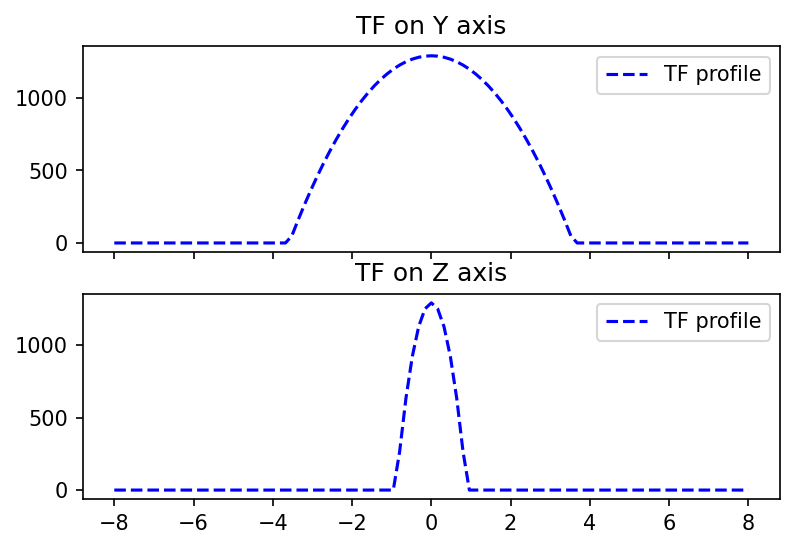

In [4]:
# parameters for this simulation
N = 100000 # number of particles
pi = 4 * np.arctan(1) 
omgx = 1.0 # trap frequency along x and y direction
z2x = 4 # Ration between the trap frequency of z and x
omgz = omgx*z2x # trap frequency along z direction
omg = (omgx*omgx*omgz)**(1/3) 
aho = 1/np.sqrt(omg)
a = 0.001 # self interaction: s-wave scattering length
g = 4*pi*a

R = (15*N*a/aho)**(1/5)*aho       # radius of condensate
Rc = (15*N*a/aho)**(1/5)*aho       # radius of condensate
rh = R*(aho/R)**2                    # healing length
# omgc = 5/(2*R**2)*np.log(R/rh)
omgc = 5/(2*R**2)*np.log(0.671*R/rh) # Critical angular velocity to generate vortices
mu = omg/2*(15*N*a/aho)**(2/5)
print(R, rh, g, omg, omgc)
def fermiFunc(x, y, z):
    n = (mu-1/2*omg**2*(x**2+y**2+(z2x*z)**2))/g
    n_mask = n<0
    n[n_mask] = 0
    return n

xd= np.linspace(-8, 8, 100+1)
yd= np.linspace(-8, 8, 100+1)
zd= np.linspace(-8, 8, 100+1)


fig, (ax1, ax2) = plt.subplots(2, 1, dpi=150, sharex=True, sharey=True)


ax1.plot(yd, fermiFunc(0,yd,0), 'b--', label="TF profile")
ax1.legend()
# # ax2 = fig.add_subplot(212)
# # ax2.plot(z, dfVz.phi, 'b*', label="trap simulation")
ax1.set_title(r'TF on Y axis')

ax2.plot(zd, fermiFunc(0,0,zd), 'b--', label="TF profile")
ax2.legend()
# ax2 = fig.add_subplot(212)
# ax2.plot(z, dfVz.phi, 'b*', label="trap simulation")
ax2.set_title(r'TF on Z axis')

In [15]:
#densX0004065_0.6.dat
#densX0003150_0.8.dat
#densX0000650_0.45.dat
#densX0000650_0.4.dat
#densX0000650_0.0.dat
#densX0000140.dat

file_prefix = "./"
dfd = pd.read_csv(file_prefix+"densX0000140.dat", sep=" ",  names=["X","Y","Z","dens"])
datad = np.array([dfd.X.values, dfd.Y.values, dfd.Z.values, dfd.dens.values])
Nxd = 50
Nyd = 50
Nzd = 50
xrd = max(datad[0])
xld = min(datad[0])
yrd = max(datad[1])
yld = min(datad[1])
zrd = max(datad[2])
zld = min(datad[2])
dxd = (xrd-xld)/Nxd
dyd = (yrd-yld)/Nyd
dzd = (zrd-zld)/Nzd
print((Nxd+1)*(Nyd+1)*(Nzd+1))
print([xld,dxd,Nxd,yld,dyd,Nyd,zld,dzd,Nzd])
dfd

132651
[-3.0, 0.12, 50, -3.0, 0.12, 50, -3.0, 0.12, 50]


,X,Y,Z,dens
0,-3.0,-3.0,-3.00,0.0
1,-3.0,-3.0,-2.88,0.0
2,-3.0,-3.0,-2.76,0.0
3,-3.0,-3.0,-2.64,0.0
4,-3.0,-3.0,-2.52,0.0
...,...,...,...,...
132646,3.0,3.0,2.52,0.0
132647,3.0,3.0,2.64,0.0
132648,3.0,3.0,2.76,0.0
132649,3.0,3.0,2.88,0.0


(51, 4)
(51, 4)


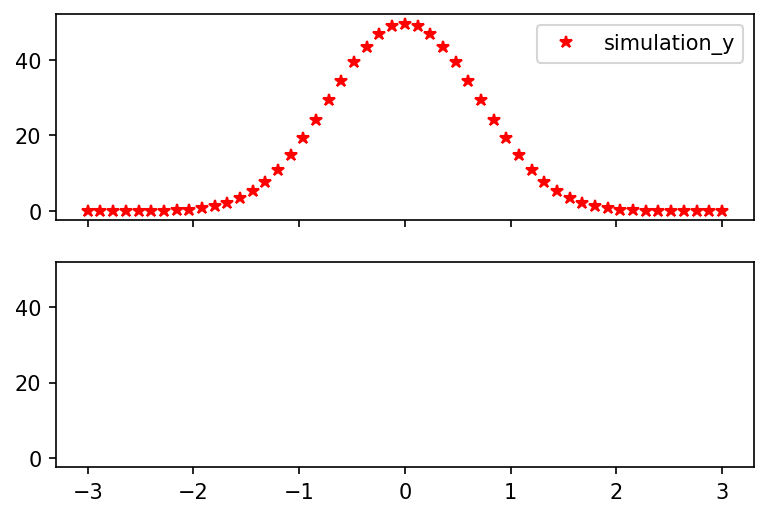

In [22]:
# Take the y axis where x and z are 0
dfzd = dfd[(dfd.X == 0)&(dfd.Z == 0)]

print(dfzd.shape)
xd= np.linspace(xld, xrd, Nxd+1)
yd= np.linspace(yld, yrd, Nyd+1)
zd= np.linspace(zld, zrd, Nzd+1)

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=150, sharex=True, sharey=True)

ax1.plot(yd, dfzd.dens, 'r*', label="simulation_y")

#ax1.set_xscale('log')
ax1.legend()
# # ax2 = fig.add_subplot(212)
# # ax2.plot(z, dfVz.phi, 'b*', label="trap simulation")
#ax1.set_title(r'Simulation on Y axis, $\Omega=0.8$')
#dfzd = dfd[(dfd.X == 0)&(dfd.Y == 0)]
print(dfzd.shape)
#ax2.plot(zd, dfzd.dens, 'r*', label="simulation")
#ax2.plot(zd, fermiFunc(0,0,zd), 'b--', label="TF profile")
#ax2.legend()
# ax2 = fig.add_subplot(212)
# ax2.plot(z, dfVz.phi, 'b*', label="trap simulation")
#ax2.set_title(r'Simulation on Z axis, $\Omega=0.8$')

# Rotation Curve Calculation

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata as gd

#Creating 3D grid
x=dfd.X
y=dfd.Y
z=dfd.Z
v=dfd.dens

gdN=31j

xi,yi,zi=np.ogrid[-3:3:gdN, -3:3:gdN, -3:3:gdN]
X1=xi.reshape(xi.shape[0],)
Y1=yi.reshape(yi.shape[1],)
Z1=zi.reshape(zi.shape[2],)
ar_len=len(X1)*len(Y1)*len(Z1)
X=np.arange(ar_len,dtype=float)
Y=np.arange(ar_len,dtype=float)
Z=np.arange(ar_len,dtype=float)
l=0
for i in range(0,len(X1)):
    for j in range(0,len(Y1)):
        for k in range(0,len(Z1)):
            X[l]=X1[i]
            Y[l]=Y1[j]
            Z[l]=Z1[k]
            l=l+1
            
#interpolate density profile data to the grid (To reduce data size)
V = gd((x,y,z), v, (X,Y,Z), method='linear')


Text(0.5, 0, 'Z')

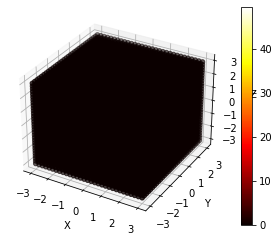

In [39]:
fig2 = plt.figure()
ax2=fig2.gca(projection='3d')
sc2=ax2.scatter(X, Y, Z, c=V, cmap=plt.hot())
plt.colorbar(sc2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

In [50]:
#interpolate 3D volumn (Create function of arbitrary point)

from scipy.interpolate import RegularGridInterpolator
from numpy import linspace, zeros, array
gdN = 31
x_0 = linspace(-3,3,gdN)
y_0 = linspace(-3,3,gdN)
z_0 = linspace(-3,3,gdN)
V_0 = zeros((gdN,gdN,gdN))
for i in range(gdN):
    for j in range(gdN):
        for k in range(gdN):
            V_0[i,j,k] = V[i*len(x_0)*len(x_0)+j*len(y_0)+k]  #map the 3D coord to 1D array
fn = RegularGridInterpolator((x_0,y_0,z_0), V_0) #Interpolate in the 3D coord

print(fn([0,0,0]))

#fig3 = plt.figure()
#ax3=fig3.gca(projection='3d')
#sc3=ax3.scatter(X, Y, Z, c=V_0, cmap=plt.hot())
#plt.colorbar(sc3)
#ax3.set_xlabel('X')
#ax3.set_ylabel('Y')
#ax3.set_zlabel('Z')

[49.5967]


In [280]:
x0_arr = []
for i in range(pt):
    x0_arr.append([x_r[i],0,0])

def V_nv(x,y,z):
    return (fn([x,y,z])[0]/fn([0,0,0])[0])
V=np.vectorize(V_nv)

<ipython-input-281-85b8674d2b38>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(x_r/0.071), (V(x_r,0,0)), label="simulation")
<ipython-input-281-85b8674d2b38>:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(x_r/0.071), (V(x_r,0,0)), label="simulation")


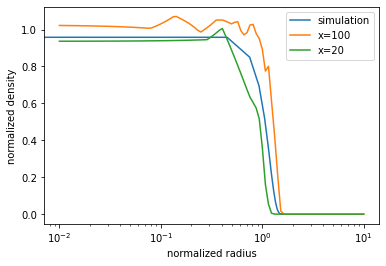

In [281]:
plt.plot(np.log10(x_r/0.071), (V(x_r,0,0)), label="simulation")
x_ref_arr= np.linspace(-2,1,100)
plt.plot((10**x_ref_arr),ref_100X(10**x_ref_arr),label="x=100")
plt.plot((10**x_ref_arr),ref_20X(10**x_ref_arr),label="x=20")
plt.xscale("log")
plt.ylabel("normalized density")
plt.xlabel("normalized radius")
plt.legend()


In [285]:
pt= 31 #iteration in for loop 

def M(r):
    pt=31
    x_r=np.linspace(-r,r,pt)
    y_r=np.linspace(-r,r,pt)
    z_r=np.linspace(-r,r,pt)
    
    Vx=[]
    for x_i in range(pt):
        Vy=[]
        for y_i in range(pt):
            Vz=[]
            z_ma = []
            for z_i in range(pt):
                z_ma.append([x_r[x_i],y_r[y_i],z_r[z_i]])
            Vz = fn(z_ma)
            Zsum = (2*sum(Vz[1:pt-1])+Vz[0]+Vz[pt-1])*4/2/pt
            Vy.append(Zsum)
        Ysum = (2*sum(Vy[1:pt-1])+Vy[0]+Vy[pt-1])*2*r/2/pt
        Vx.append(Ysum)
    Xsum = np.trapz(Vx,x_r,pt)
    return Xsum
    

M(3)

152.55522899270272

<ipython-input-288-1d36472b7dc1>:9: RuntimeWarning: invalid value encountered in double_scalars
  v_arr.append(G0*(M(r_arr[i])*M0/r_arr[i])**0.5 *L0/T0)  #plotting the circular velocity base on Virial Thm


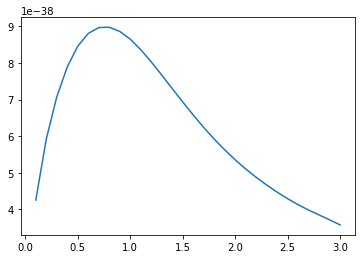

In [288]:
M0 = 1.445e-25
T0 = 0.016
L0 = 3.42e-6
G0 = 6.6743e-11 * M0 * T0**2 / L0**3  #Choice of Unit

r_arr=np.linspace(0,3,31)
v_arr= []
for i in range(31):
    v_arr.append(G0*(M(r_arr[i])*M0/r_arr[i])**0.5 *L0/T0)  #plotting the circular velocity base on Virial Thm
plt.plot(r_arr,v_arr)


#plt.plot(r_arr,v_arr_nr)

